In [1]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

# Visualisation libraries
import matplotlib as plt 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline




from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#!pip install imbalanced-learn

from sklearn.model_selection import LeaveOneOut



from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data=pd.read_csv('train_LZV4RXX.csv') 
test_data=pd.read_csv('test_4zJg83n.csv')
data.shape

(7000, 10)

In [3]:
#......................

In [4]:
def operations(df):
    df=pd.get_dummies(df,drop_first=True)
    return df

In [5]:
test_data=operations(test_data)

In [6]:
data.drop('loan_id',inplace=True,axis=1)
data2=pd.get_dummies(data,drop_first=True)

In [6]:
#................................................

<AxesSubplot:>

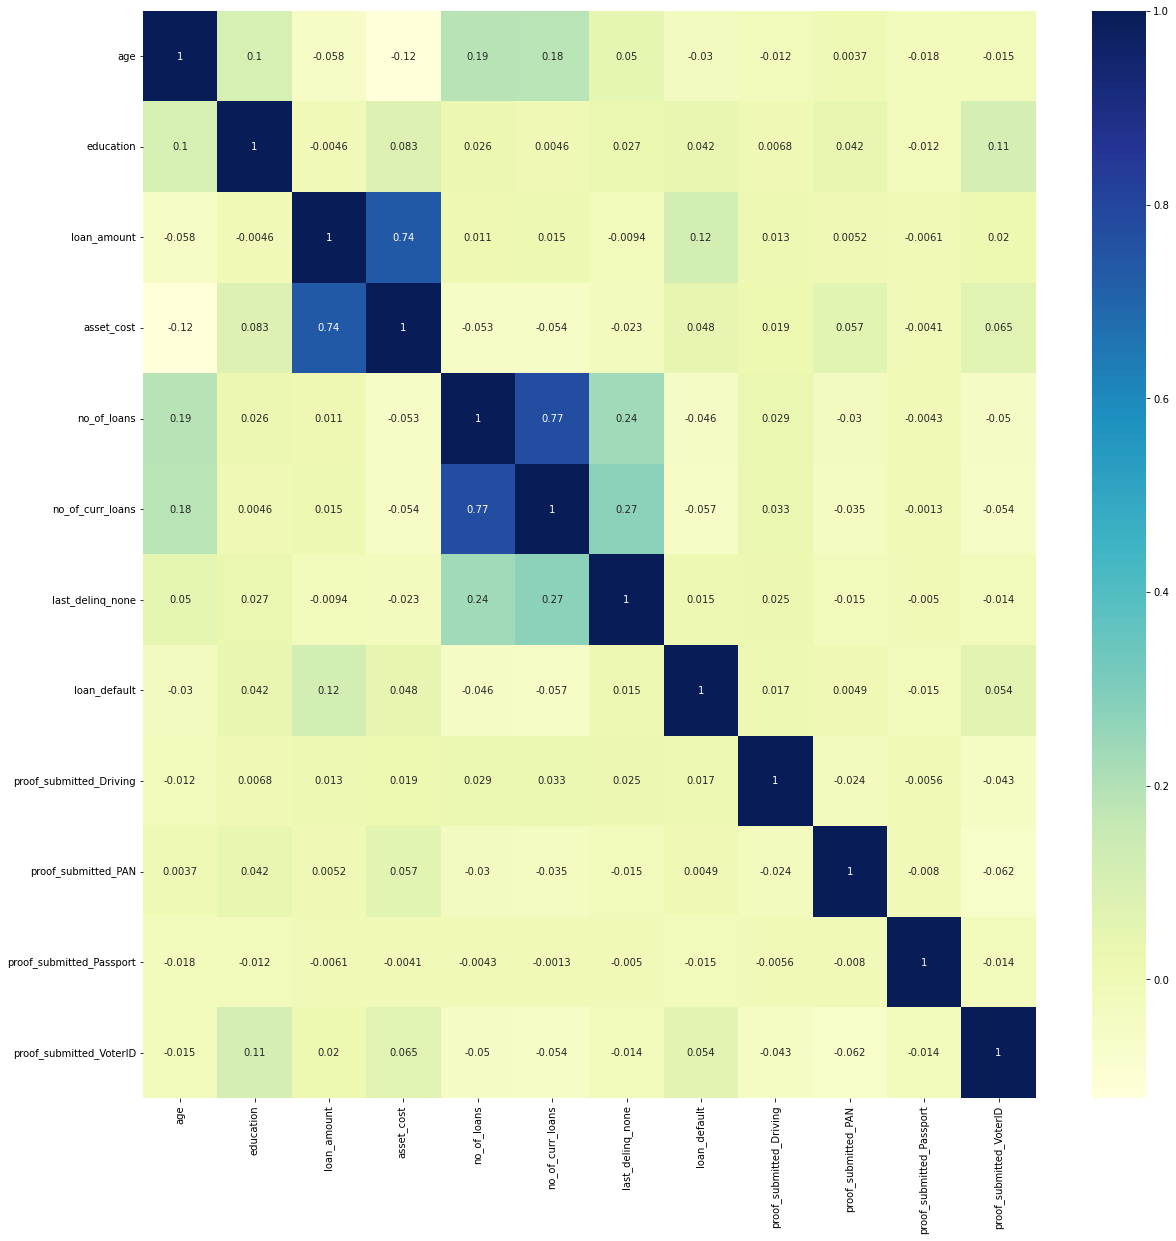

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(data2.corr(), cmap="YlGnBu", annot=True)

In [ ]:
#..............................................................................

In [11]:
numeric_cols=data2.select_dtypes(exclude=['category','object']).columns

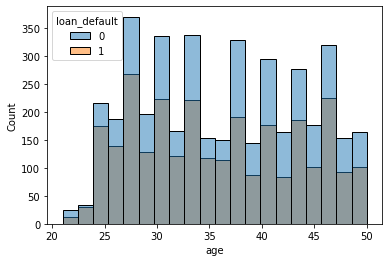

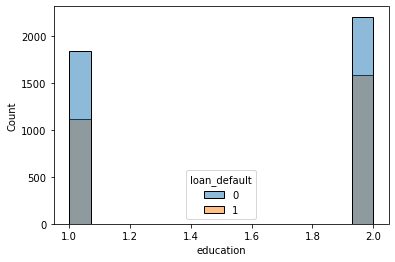

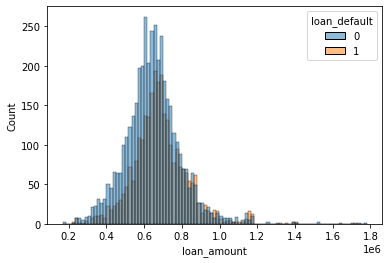

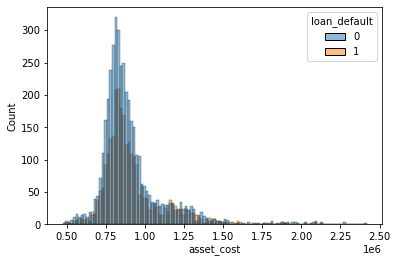

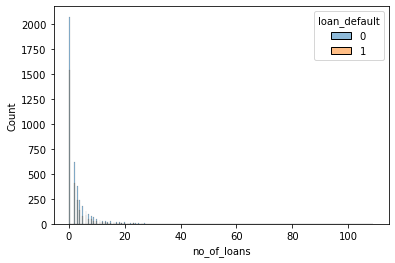

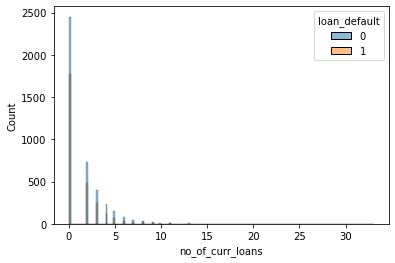

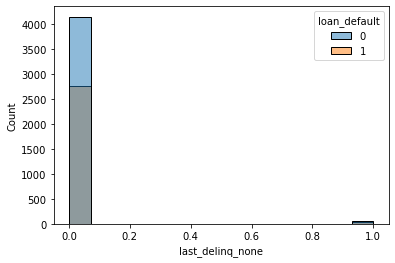

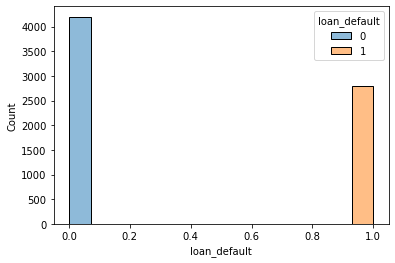

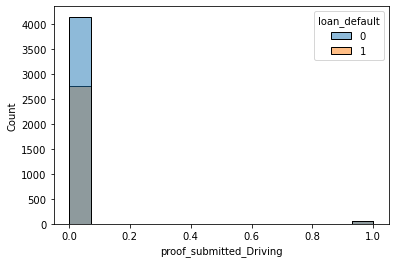

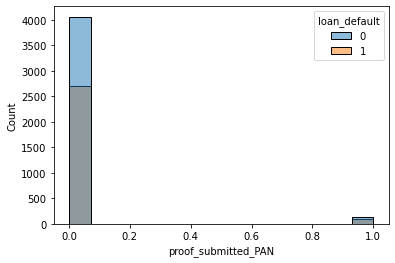

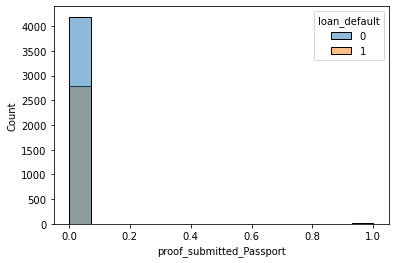

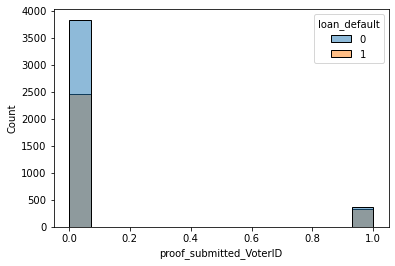

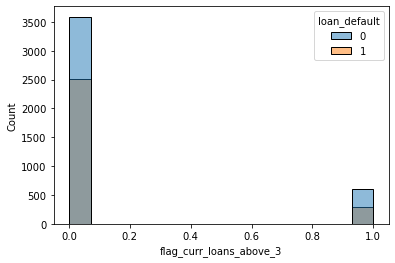

In [18]:
for i in numeric_cols:
    sns.histplot(x=i,hue='loan_default',data=data2)
    plt.show()

data2['flag_curr_loans_above_3']=data2['no_of_curr_loans'].apply(lambda x: 1 if x>3 else 0)
test_data['flag_curr_loans_above_3']=test_data['no_of_curr_loans'].apply(lambda x: 1 if x>3 else 0)

In [47]:
data2['flag_overburden']=((data['no_of_curr_loans']>3) & (data2['last_delinq_none']==1)  ).astype('int')
test_data['flag_overburden']=((test_data['no_of_curr_loans']>3) & (test_data['last_delinq_none']==1)  ).astype('int')

In [48]:
data2['flag_overburden'].value_counts()

0    6927
1      73
Name: flag_overburden, dtype: int64

In [49]:
data2.columns

Index(['age', 'education', 'loan_amount', 'asset_cost', 'no_of_loans',
       'no_of_curr_loans', 'last_delinq_none', 'loan_default',
       'proof_submitted_Driving', 'proof_submitted_PAN',
       'proof_submitted_Passport', 'proof_submitted_VoterID',
       'flag_overburden'],
      dtype='object')

In [50]:
data2['last_delinq_none'].value_counts()

0    6907
1      93
Name: last_delinq_none, dtype: int64

In [60]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data2['age'].describe()

count   7000.000
mean      36.097
std        7.588
min       21.000
25%       29.000
50%       36.000
75%       43.000
max       50.000
Name: age, dtype: float64

In [52]:
# define X and y
y = data2['loan_default'].astype('int')
X = data2.drop('loan_default',axis=1)
    
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1,stratify=y)

In [53]:
data.columns

Index(['age', 'education', 'proof_submitted', 'loan_amount', 'asset_cost',
       'no_of_loans', 'no_of_curr_loans', 'last_delinq_none', 'loan_default'],
      dtype='object')

In [54]:

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
#import shap
from sklearn.model_selection import train_test_split
# , GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


from sklearn.metrics import roc_auc_score, roc_curve, auc

def auc_fp_tp(model_full, X_test, y_test):

    pred_test = model_full.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, pred_test)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc, pred_test

import operator
import os
def auc_fp_tp(model_full, X_test, y_test):

    dTest = xgb.DMatrix(X_test, y_test)
    pred_test = model_full.predict(dTest)

    fpr, tpr, _ = roc_curve(y_test, pred_test)
    roc_auc = auc(fpr, tpr)

    gini=2*roc_auc-1

    return fpr, tpr, roc_auc, pred_test,gini

seed = 199,'max_depth': 6,threshold = 0.498,num_round = 25,'eta': 0.001

[00:34:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "eval_metrics", "nfold", "obj", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




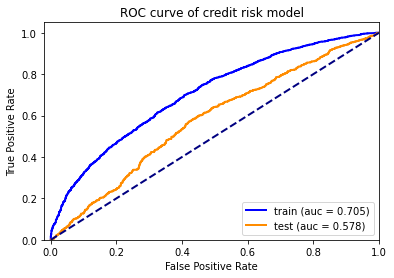

,feature,fscore
11,asset_cost,0.305
10,loan_amount,0.283
9,age,0.155
8,no_of_loans,0.097
7,no_of_curr_loans,0.063
6,education,0.037
5,proof_submitted_VoterID,0.025
4,proof_submitted_Driving,0.015
3,proof_submitted_PAN,0.009
2,last_delinq_none,0.007


Accuracy 0.6579591836734694
              precision    recall  f1-score   support

           0       0.95      0.65      0.77      4326
           1       0.22      0.75      0.34       574

    accuracy                           0.66      4900
   macro avg       0.58      0.70      0.55      4900
weighted avg       0.86      0.66      0.72      4900


Accuracy 0.5933333333333334
              precision    recall  f1-score   support

           0       0.90      0.61      0.73      1852
           1       0.14      0.47      0.22       248

    accuracy                           0.59      2100
   macro avg       0.52      0.54      0.47      2100
weighted avg       0.81      0.59      0.67      2100

auc_train 0.7054741947799528
gini_train 0.41094838955990554
auc_test 0.5784084467120181
gini_test 0.15681689342403615
Train:
[[2795  145]
 [1531  429]]

Test:
[[1129  131]
 [ 723  117]]
Target Rate: 0.4
Threshold: 0.498


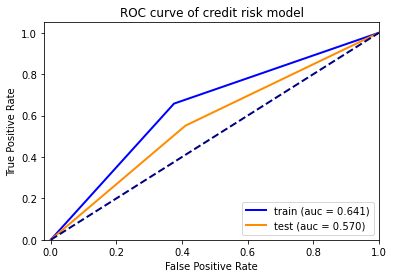

auc_train 0.6410714285714285
gini_train 0.28214285714285703
auc_test 0.5704365079365079
gini_test 0.14087301587301582
Accuracy 0.6377551020408163
              precision    recall  f1-score   support

           0       0.73      0.62      0.67      2940
           1       0.54      0.66      0.59      1960

    accuracy                           0.64      4900
   macro avg       0.64      0.64      0.63      4900
weighted avg       0.65      0.64      0.64      4900

####################################################################################################
Accuracy 0.5742857142857143
              precision    recall  f1-score   support

           0       0.66      0.59      0.62      1260
           1       0.47      0.55      0.51       840

    accuracy                           0.57      2100
   macro avg       0.57      0.57      0.57      2100
weighted avg       0.59      0.57      0.58      2100

#######################################################################

In [55]:
seed = 199

# Parameter
param1 = {'silent':True
         , 'obj':'binary:logistic'
         , 'eval_metrics':"auc"         
         , 'subsample': 0.7
         , 'max_depth': 6
         , 'eta': 0.001
         , 'gamma': 0
         , 'lambda': 0
         , 'alpha': 1         , 'colsample_bytree': 1
         , 'colsample_bylevel': 1
         , 'colsample_bynode': 1         
         , 'nfold':10
         , 'seed': seed
         } 



# train final model
dtrain = xgb.DMatrix(X_train, y_train)
dTest = xgb.DMatrix(X_test,y_test)
params = param1
num_round = 25
model = xgb.train(params, dtrain, num_round)  


pred_train = model.predict(dtrain)
pred_test = model.predict(dTest)

pred_train_adj = [1 if a_ >= 0.5 else 0 for a_ in pred_train]
pred_test_adj = [1 if a_ >= 0.5 else 0 for a_ in pred_test]

fpr_train, tpr_train, auc_train, pred_train,gini_train = auc_fp_tp(model, X_train,y_train)
fpr_test, tpr_test, auc_test, pred_test,gini_test = auc_fp_tp(model, X_test, y_test)

# w/ tenure
# plot ROC
plt.figure()
lw = 2

plt.plot(fpr_train, tpr_train, color='blue',
         lw=lw, label='train (auc = %0.3f)' % auc_train)

plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=lw, label='test (auc = %0.3f)' % auc_test)


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of credit risk model')
plt.legend(loc="lower right")
plt.show()

importance = model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()
display(df.sort_values(by='fscore', ascending=False))









print("Accuracy",accuracy_score(pred_train_adj,y_train))
print(classification_report(pred_train_adj,y_train))
print()

#y_pred_test = xgbMT.predict(X_test)

print("Accuracy",accuracy_score(pred_test_adj,y_test))
print(classification_report(pred_test_adj,y_test))


print('auc_train',auc_train)
print('gini_train',gini_train)
print('auc_test',auc_test)
print('gini_test',gini_test)

print("Train:")
print(confusion_matrix(y_train, pred_train_adj))
print()
print("Test:")
print(confusion_matrix(y_test, pred_test_adj))


#############

target_rate = y_train.sum()/y_train.shape[0]
print("Target Rate:",target_rate)

# raise

threshold = 0.498
print('Threshold:',threshold)
#############


pred_train_adj = [1 if a_ >= threshold else 0 for a_ in pred_train]
pred_test_adj = [1 if a_ >= threshold else 0 for a_ in pred_test]

#.................................................................................
def auc_fp_tp_adj(model_full, y_test, pred_test):
    
    fpr, tpr, _ = roc_curve(y_test, pred_test)
    roc_auc = auc(fpr, tpr)

    gini=2*roc_auc-1

    return fpr, tpr, roc_auc, pred_test,gini

fpr_train, tpr_train, auc_train, pred_train,gini_train = auc_fp_tp_adj(model,y_train,pred_train_adj)
fpr_test, tpr_test, auc_test, pred_test,gini_test = auc_fp_tp_adj(model, y_test, pred_test_adj)


plt.figure()
lw = 2

plt.plot(fpr_train, tpr_train, color='blue',
         lw=lw, label='train (auc = %0.3f)' % auc_train)

plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=lw, label='test (auc = %0.3f)' % auc_test)


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of credit risk model')
plt.legend(loc="lower right")
plt.show()



print('auc_train',auc_train)
print('gini_train',gini_train)
print('auc_test',auc_test)
print('gini_test',gini_test)
#.......................................................................


print("Accuracy",accuracy_score(y_train, pred_train_adj))
print(classification_report(y_train,pred_train_adj))

print('#'*100)

print("Accuracy",accuracy_score(y_test,pred_test_adj))
print(classification_report(y_test,pred_test_adj))

print('#'*100)

print("Train:")
print(confusion_matrix(y_train, pred_train_adj))
print()


print()
print("Test:")
print(confusion_matrix(y_test, pred_test_adj))
print()








In [11]:
threshold

0.498

In [12]:
final_predictions=pd.DataFrame(test_data['loan_id'],columns=['loan_id'])
test_data.drop('loan_id',inplace=True,axis=True)

In [56]:
test_results=model.predict(xgb.DMatrix(test_data))

In [57]:
loan_default= [1 if a_ >= 0.498 else 0 for a_ in test_results]

In [58]:
final_predictions['loan_default']=loan_default

In [59]:
final_predictions['loan_default'].value_counts()

0    1568
1    1432
Name: loan_default, dtype: int64

In [43]:
final_predictions.set_index('loan_id', drop=True,  inplace=True)

KeyError: "None of ['loan_id'] are in the columns"

In [44]:
final_predictions

,loan_default
loan_id,
7001,1
7002,0
7003,0
7004,0
7005,1
...,...
9996,0
9997,0
9998,0


In [45]:
final_predictions.to_csv('final_predictions.csv')